In [19]:
import pandas as pd
import numpy as np

# Load your CSV files
stardist_df = pd.read_csv('stardist_cw_histaugan_segmentation_stats.csv')
cellpose_df = pd.read_csv('Cellpose_CW_histaugan_segmentation_stats.csv')
hovernet_df = pd.read_csv('hovernet_cw_segarea_stats.csv')
instaseg_df = pd.read_csv('instanseg_cw_histaugan_segmentation_stats.csv')

stardist_df_umc = pd.read_csv('stardist_UMCU_histaugan_segmentation_stats.csv')
cellpose_df_umc = pd.read_csv('Cellpose_UM_histaugan_segmentation_stats.csv')
hovernet_df_umc = pd.read_csv('hovernet_UMCU_segarea_stats.csv')
instaseg_df_umc = pd.read_csv('instanseg_umc_histaugan_segmentation_stats.csv')



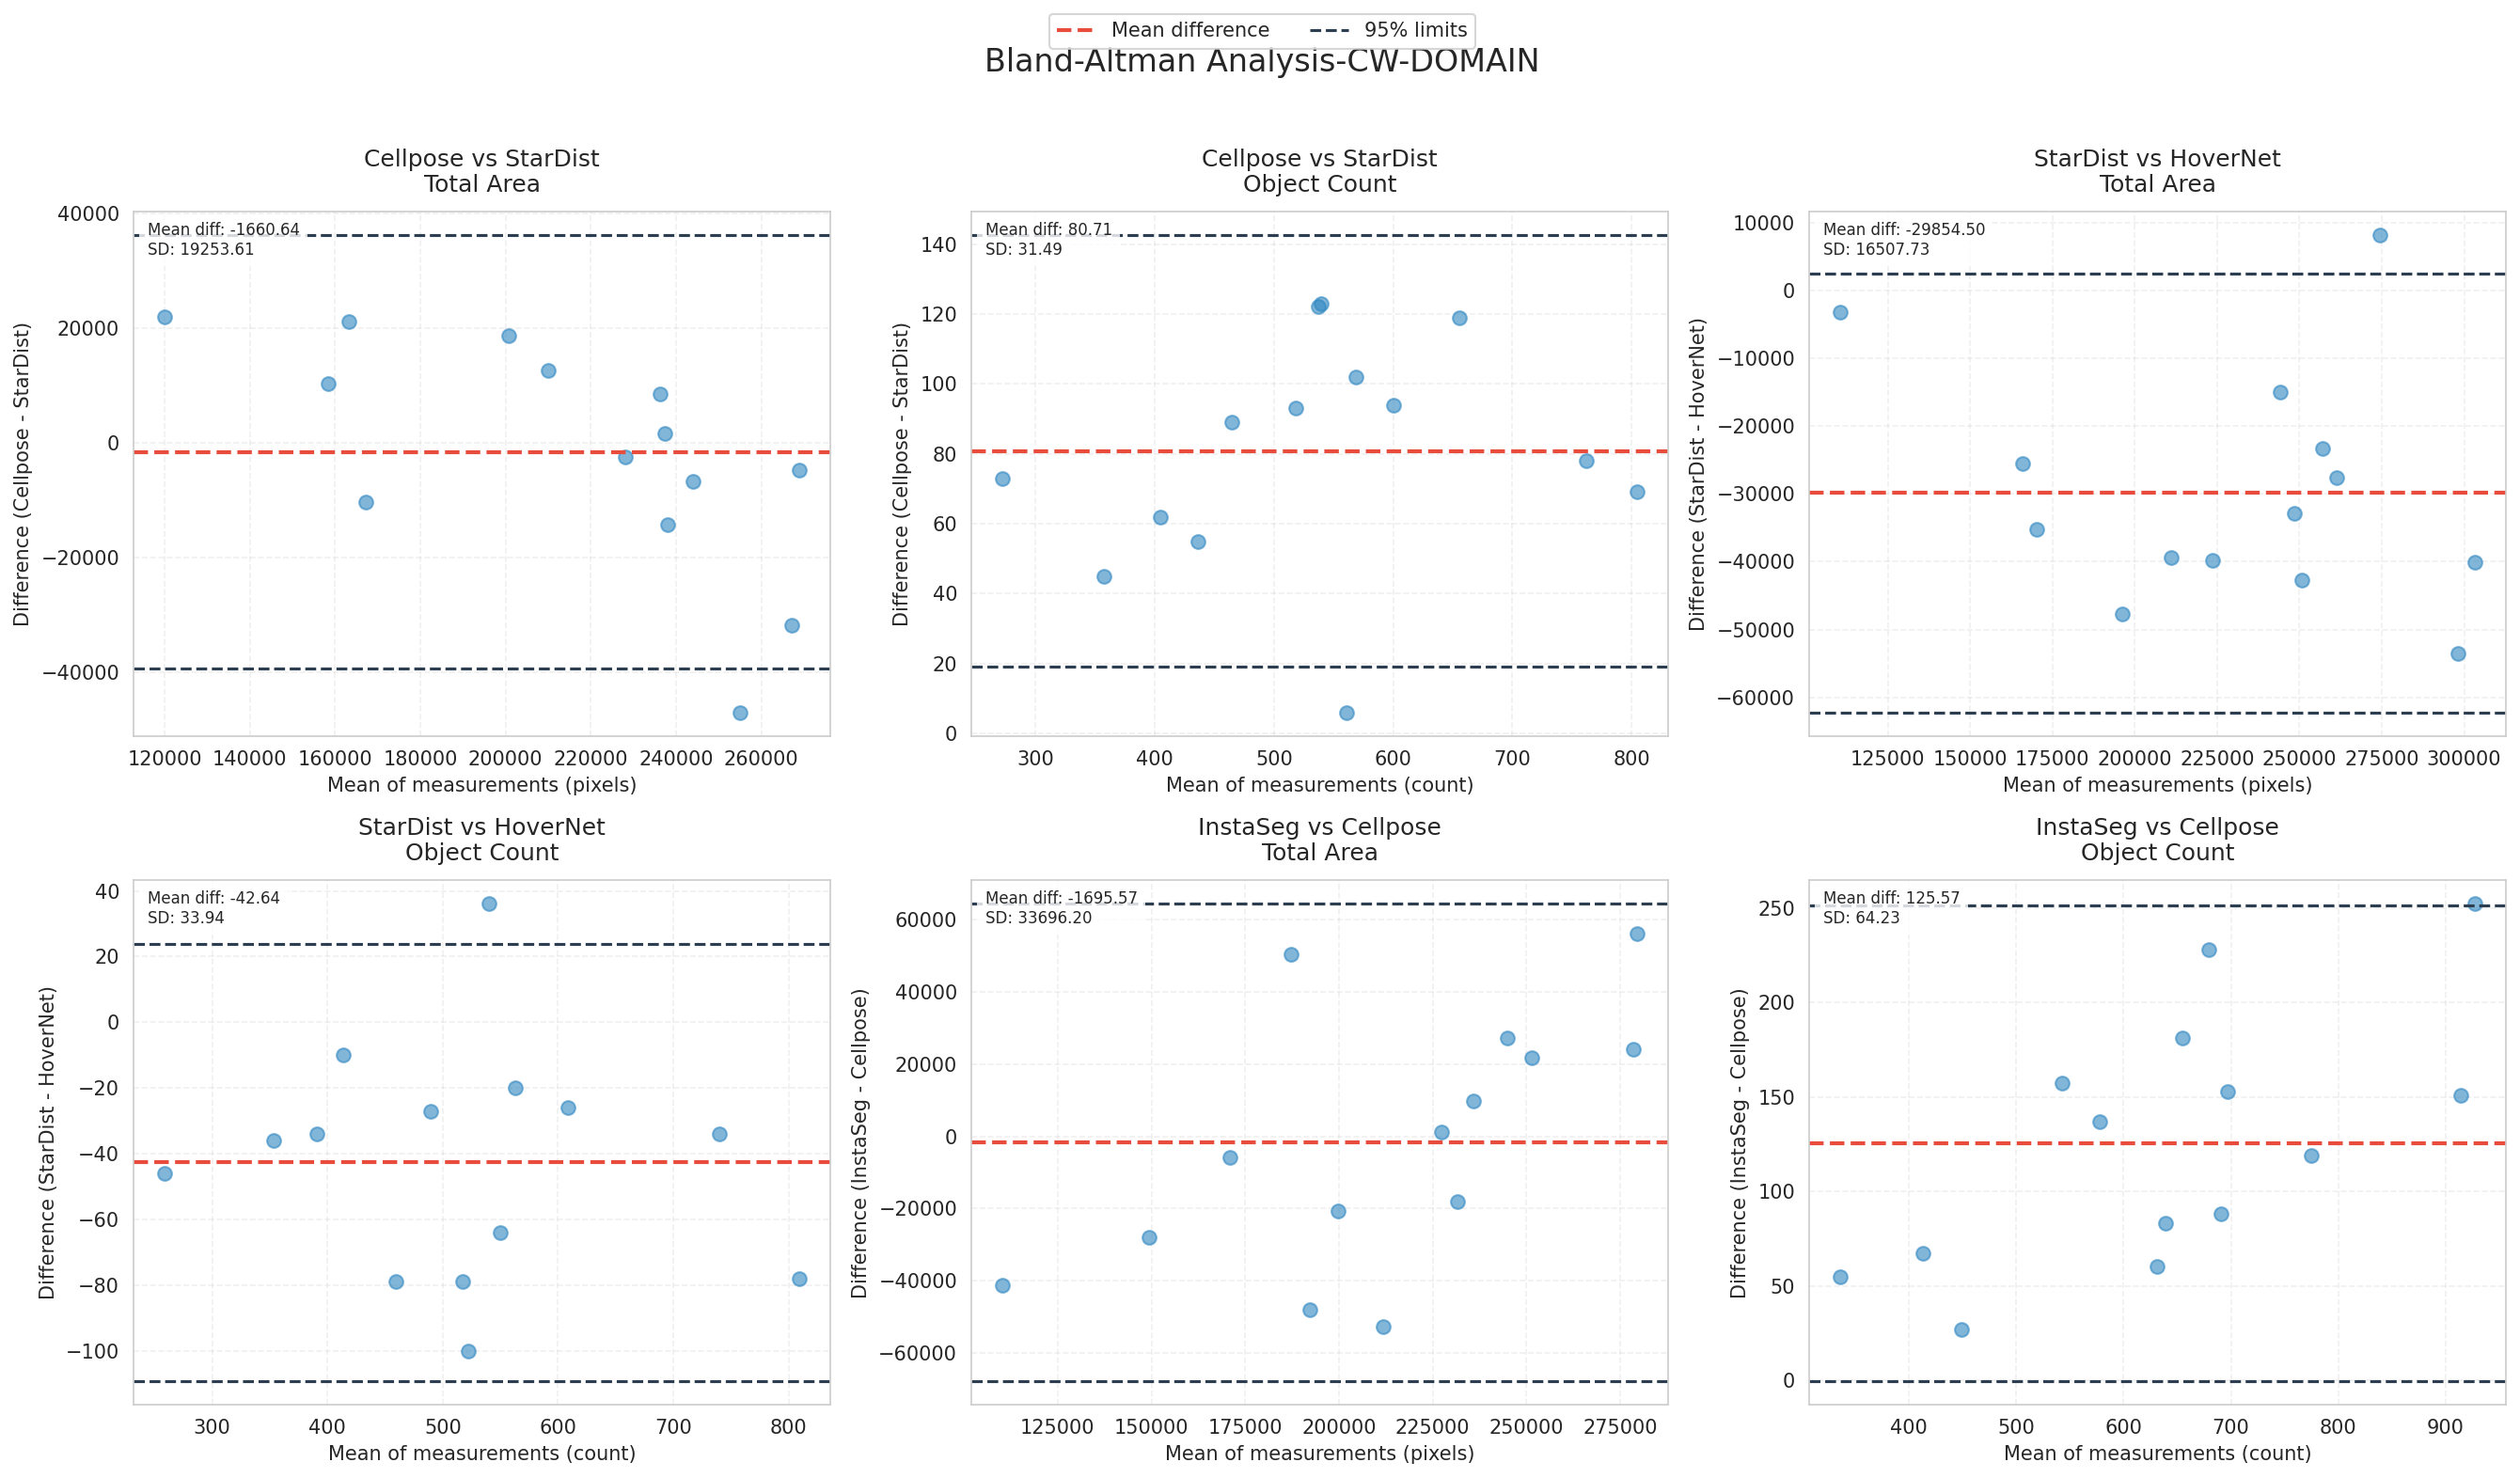

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bland_altman_subplot(data1, data2, method1, method2, metric, units, ax):
    """
    Create Bland-Altman plot as a subplot
    """
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    
    # Pad shorter array if needed
    max_len = max(len(data1), len(data2))
    if len(data1) < max_len:
        data1 = np.pad(data1, (0, max_len - len(data1)), 'constant')
    if len(data2) < max_len:
        data2 = np.pad(data2, (0, max_len - len(data2)), 'constant')
    
    mean = (data1 + data2) / 2
    diff = data1 - data2
    md = np.mean(diff)
    sd = np.std(diff)
    
    # Scatter plot
    ax.scatter(mean, diff, alpha=0.6, c='#2E86C1', s=50)
    
    # Add lines
    ax.axhline(y=md, color='#E74C3C', linestyle='--', linewidth=2, label='Mean difference')
    ax.axhline(y=md + 1.96*sd, color='#2C3E50', linestyle='--', linewidth=1.5, label='95% limits')
    ax.axhline(y=md - 1.96*sd, color='#2C3E50', linestyle='--', linewidth=1.5)
    
    # Title and labels
    ax.set_title(f'{method1} vs {method2}\n{metric}', fontsize=12, pad=10)
    ax.set_xlabel(f'Mean of measurements ({units})', fontsize=10)
    ax.set_ylabel(f'Difference ({method1} - {method2})', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Annotate stats
    stats_text = f'Mean diff: {md:.2f}\nSD: {sd:.2f}'
    ax.annotate(stats_text, xy=(0.02, 0.98), xycoords='axes fraction',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
                fontsize=8, ha='left', va='top')
    
    return md, sd

# Plot style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load your CSV files
stardist = pd.read_csv('stardist_cw_histaugan_segmentation_stats.csv')
cellpose = pd.read_csv('Cellpose_CW_histaugan_segmentation_stats.csv')
hover_net = pd.read_csv('hovernet_cw_segarea_stats.csv')
instaseg = pd.read_csv('instanseg_cw_histaugan_segmentation_stats.csv')

# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=150)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot each comparison in its own subplot

# 1. Cellpose vs StarDist - Area
bland_altman_subplot(
    cellpose['total_area'].values,
    stardist['total_area'].values,
    'Cellpose', 'StarDist', 'Total Area', 'pixels',
    axes[0, 0]
)

# 2. Cellpose vs StarDist - Count
bland_altman_subplot(
    cellpose['object_count'].values,
    stardist['object_count'].values,
    'Cellpose', 'StarDist', 'Object Count', 'count',
    axes[0, 1]
)

# 3. StarDist vs HoverNet - Area
bland_altman_subplot(
    stardist['total_area'].values,
    hover_net['total_area'].values,
    'StarDist', 'HoverNet', 'Total Area', 'pixels',
    axes[0, 2]
)

# 4. StarDist vs HoverNet - Count
bland_altman_subplot(
    stardist['object_count'].values,
    hover_net['object_count'].values,
    'StarDist', 'HoverNet', 'Object Count', 'count',
    axes[1, 0]
)

# 5. InstaSeg vs Cellpose - Area
bland_altman_subplot(
    instaseg['total_area'].values,
    cellpose['total_area'].values,
    'InstaSeg', 'Cellpose', 'Total Area', 'pixels',
    axes[1, 1]
)

# 6. InstaSeg vs Cellpose - Count
bland_altman_subplot(
    instaseg['object_count'].values,
    cellpose['object_count'].values,
    'InstaSeg', 'Cellpose', 'Object Count', 'count',
    axes[1, 2]
)

# Add global title
fig.suptitle('Bland-Altman Analysis-CW-DOMAIN', fontsize=16, y=1.02)

# Add legend to one subplot (optional)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

# Save and display
plt.tight_layout()
plt.savefig('bland_altman_analysis-cw.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


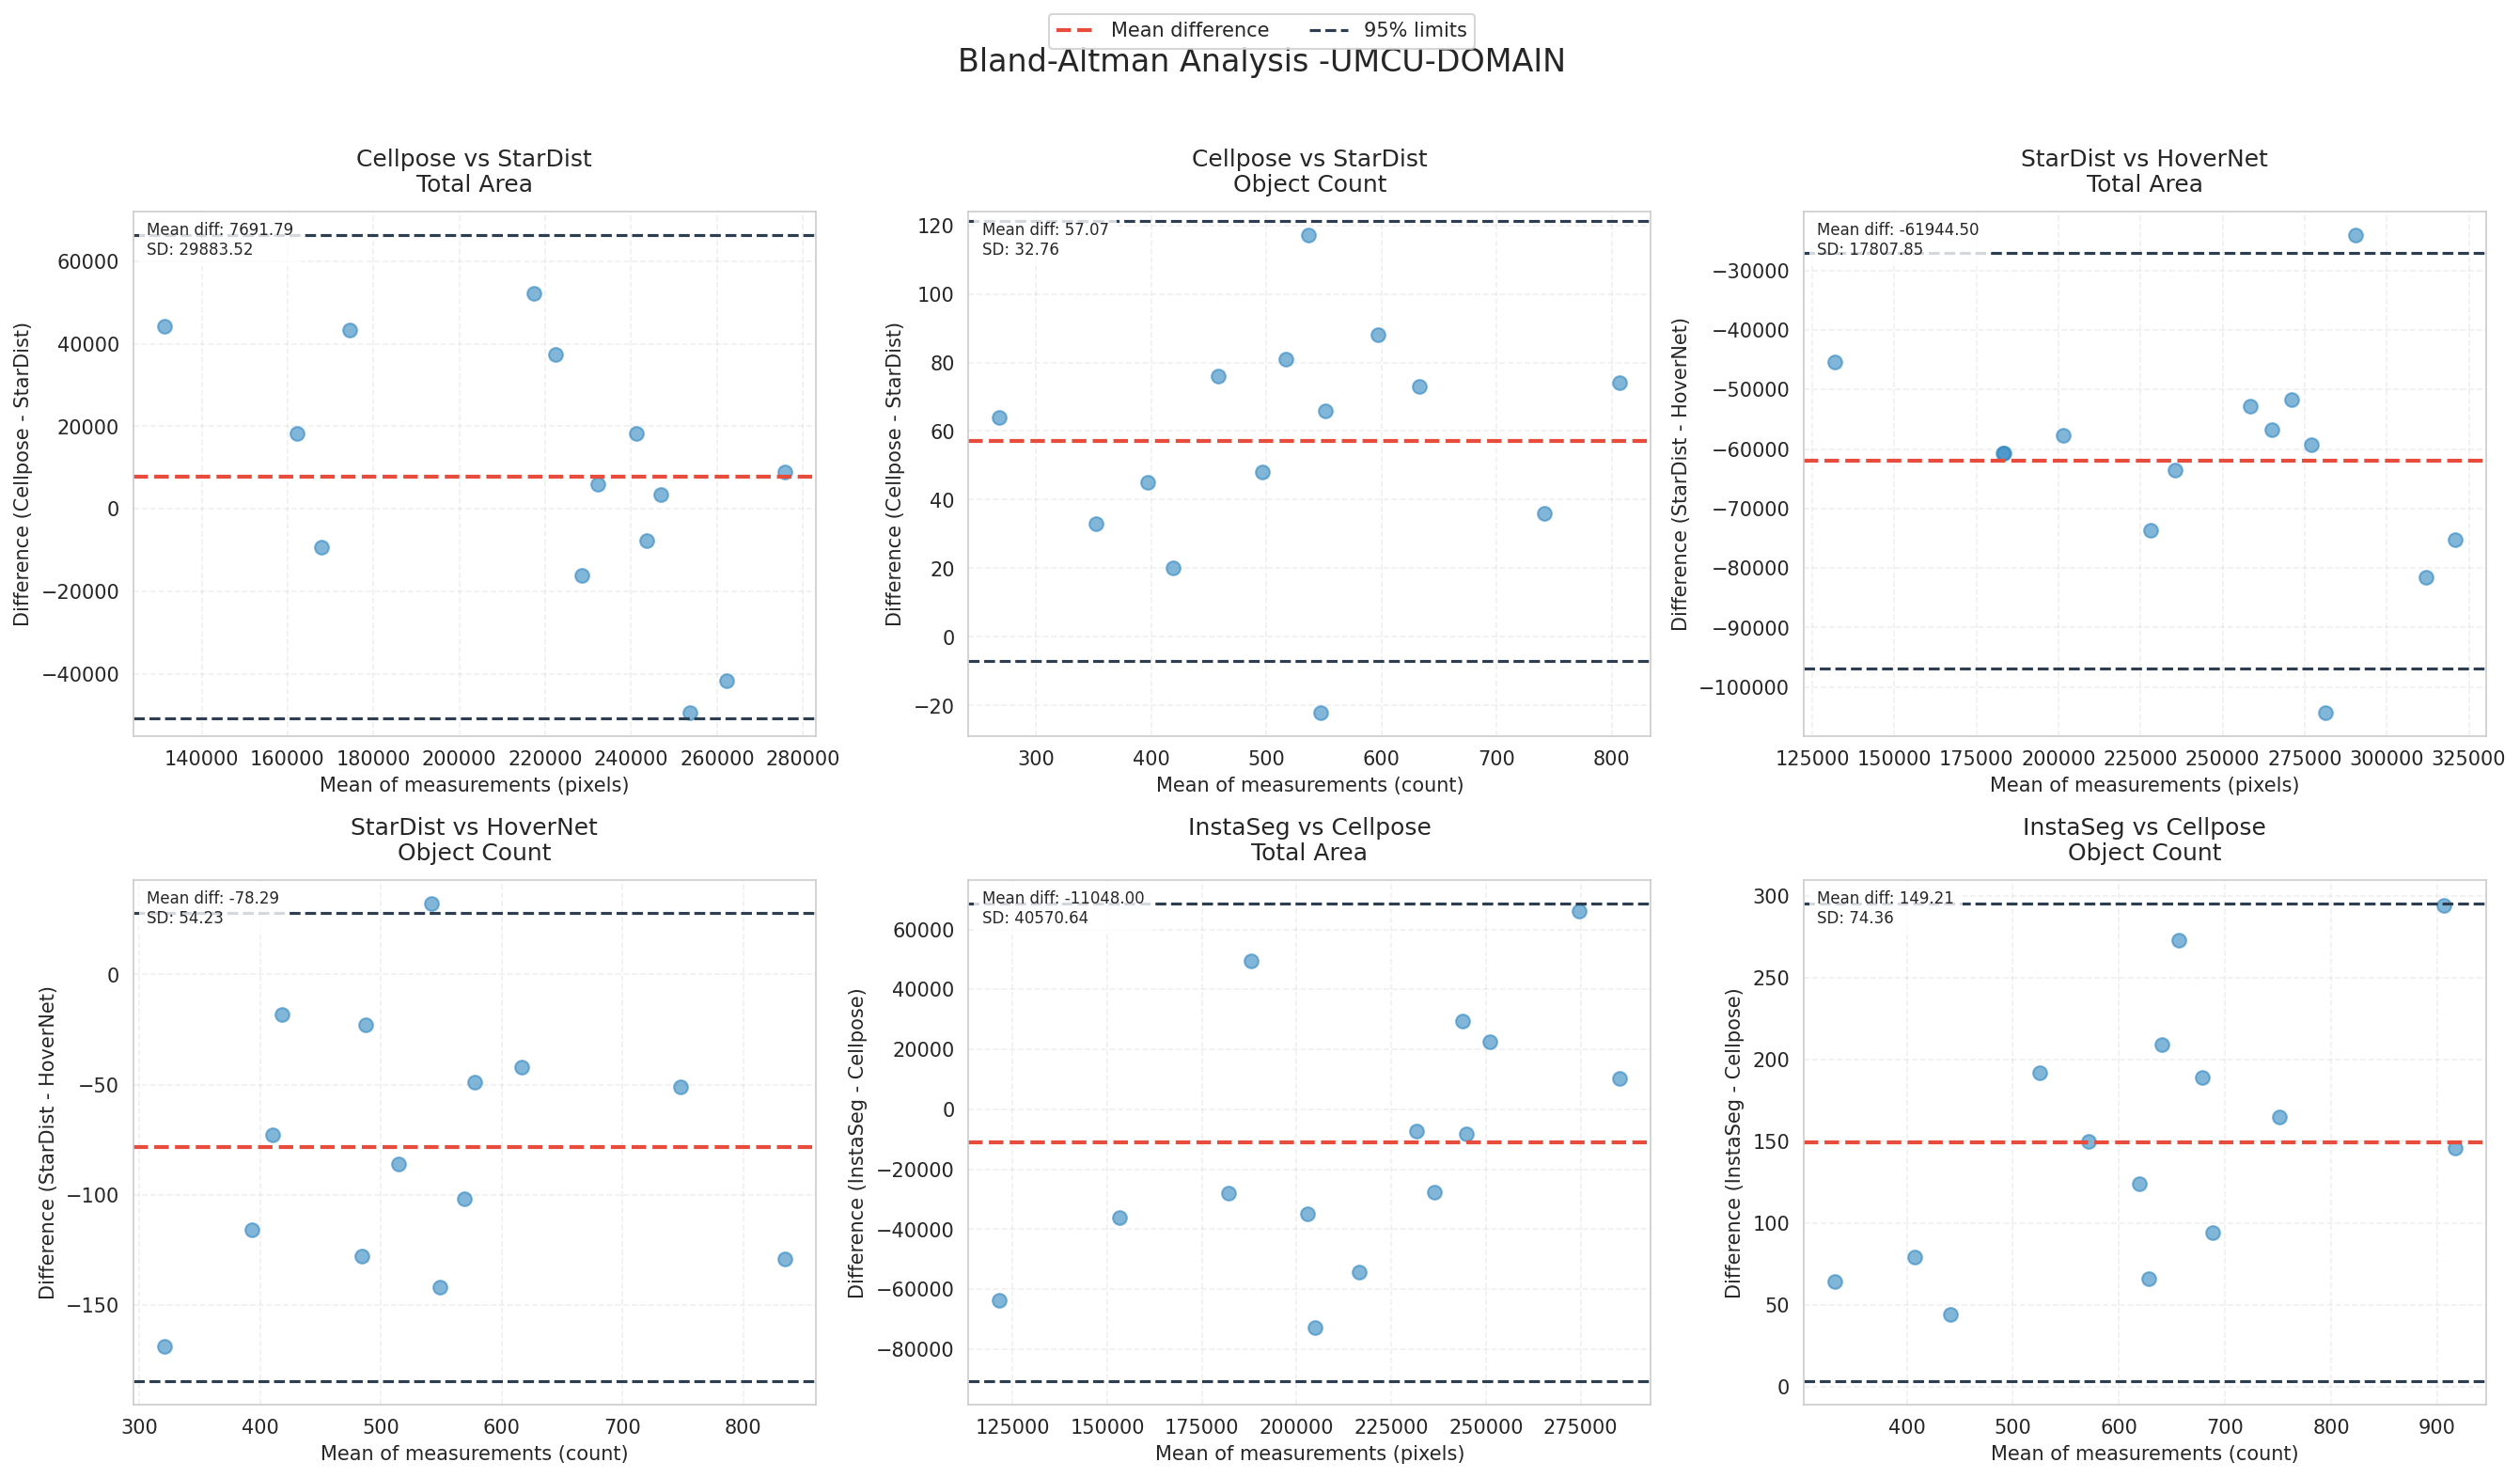

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bland_altman_subplot(data1, data2, method1, method2, metric, units, ax):
    """
    Create Bland-Altman plot as a subplot
    """
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    
    # Pad shorter array if needed
    max_len = max(len(data1), len(data2))
    if len(data1) < max_len:
        data1 = np.pad(data1, (0, max_len - len(data1)), 'constant')
    if len(data2) < max_len:
        data2 = np.pad(data2, (0, max_len - len(data2)), 'constant')
    
    mean = (data1 + data2) / 2
    diff = data1 - data2
    md = np.mean(diff)
    sd = np.std(diff)
    
    # Scatter plot
    ax.scatter(mean, diff, alpha=0.6, c='#2E86C1', s=50)
    
    # Add lines
    ax.axhline(y=md, color='#E74C3C', linestyle='--', linewidth=2, label='Mean difference')
    ax.axhline(y=md + 1.96*sd, color='#2C3E50', linestyle='--', linewidth=1.5, label='95% limits')
    ax.axhline(y=md - 1.96*sd, color='#2C3E50', linestyle='--', linewidth=1.5)
    
    # Title and labels
    ax.set_title(f'{method1} vs {method2}\n{metric}', fontsize=12, pad=10)
    ax.set_xlabel(f'Mean of measurements ({units})', fontsize=10)
    ax.set_ylabel(f'Difference ({method1} - {method2})', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Annotate stats
    stats_text = f'Mean diff: {md:.2f}\nSD: {sd:.2f}'
    ax.annotate(stats_text, xy=(0.02, 0.98), xycoords='axes fraction',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
                fontsize=8, ha='left', va='top')
    
    return md, sd

# Plot style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load your CSV files
stardist = pd.read_csv('stardist_UMCU_histaugan_segmentation_stats.csv')
cellpose = pd.read_csv('Cellpose_UM_histaugan_segmentation_stats.csv')
hover_net = pd.read_csv('hovernet_UMCU_segarea_stats.csv')
instaseg = pd.read_csv('instanseg_umc_histaugan_segmentation_stats.csv')



# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=150)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot each comparison in its own subplot

# 1. Cellpose vs StarDist - Area
bland_altman_subplot(
    cellpose['total_area'].values,
    stardist['total_area'].values,
    'Cellpose', 'StarDist', 'Total Area', 'pixels',
    axes[0, 0]
)

# 2. Cellpose vs StarDist - Count
bland_altman_subplot(
    cellpose['object_count'].values,
    stardist['object_count'].values,
    'Cellpose', 'StarDist', 'Object Count', 'count',
    axes[0, 1]
)

# 3. StarDist vs HoverNet - Area
bland_altman_subplot(
    stardist['total_area'].values,
    hover_net['total_area'].values,
    'StarDist', 'HoverNet', 'Total Area', 'pixels',
    axes[0, 2]
)

# 4. StarDist vs HoverNet - Count
bland_altman_subplot(
    stardist['object_count'].values,
    hover_net['object_count'].values,
    'StarDist', 'HoverNet', 'Object Count', 'count',
    axes[1, 0]
)

# 5. InstaSeg vs Cellpose - Area
bland_altman_subplot(
    instaseg['total_area'].values,
    cellpose['total_area'].values,
    'InstaSeg', 'Cellpose', 'Total Area', 'pixels',
    axes[1, 1]
)

# 6. InstaSeg vs Cellpose - Count
bland_altman_subplot(
    instaseg['object_count'].values,
    cellpose['object_count'].values,
    'InstaSeg', 'Cellpose', 'Object Count', 'count',
    axes[1, 2]
)

# Add global title
fig.suptitle('Bland-Altman Analysis -UMCU-DOMAIN', fontsize=16, y=1.02)

# Add legend to one subplot (optional)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

# Save and display
plt.tight_layout()
plt.savefig('bland_altman_analysis-UMCU.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
